In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from itertools import product

# Load the dataset
def load_data(file_path):
    df = pd.read_excel(file_path)
    keywords = df[[f'Keywords_Vector_{i}' for i in range(20)]]
    custom_data_structures = df[[f'Custom_Data_Structures_Vector_{i}' for i in range(20)]]
    final_marks = df["Final_Marks"]
    return keywords, custom_data_structures, final_marks

# Function to pad vectors with zeros to match length
def pad_with_zeros(vector, max_length):
    vector = np.atleast_2d(vector)
    if vector.shape[1] < max_length:
        padding = np.zeros((vector.shape[0], max_length - vector.shape[1]))
        vector = np.hstack((vector, padding))
    return vector

# Reduction and combination strategies
def combine_vectors(keywords, custom_data_structures, weights, fusion):
    weighted_keywords = weights[1] * keywords
    weighted_custom_data_structures = weights[0] * custom_data_structures

    if fusion == "add":
        max_length = max(weighted_keywords.shape[1], weighted_custom_data_structures.shape[1])
        weighted_keywords = pad_with_zeros(weighted_keywords, max_length)
        weighted_custom_data_structures = pad_with_zeros(weighted_custom_data_structures, max_length)
        combined_vectors = weighted_keywords + weighted_custom_data_structures
    return combined_vectors
# Load data
file_path = "pca.xlsx"
keywords, custom_data_structures, final_marks = load_data(file_path)


combined_vectors = combine_vectors(keywords, custom_data_structures, (1,1), "add")
X_train, X_test, y_train, y_test = train_test_split(combined_vectors, final_marks, test_size=0.2, random_state=42, stratify=final_marks)

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    l2_leaf_reg=4,
    early_stopping_rounds=15,
    random_state=43,
    verbose=0)
    
model.fit(X_train, y_train)
# Train metrics
y_train_pred = np.round(model.predict(X_train))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
# Test metrics
y_test_pred = np.round(model.predict(X_test))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
# Print metrics
print(f"Train Metrics: MAE={train_mae:.4f}, MSE={train_mse:.4f}, RMSE={train_rmse:.4f}, R2={train_r2:.4f}, MAPE={train_mape:.4f}")
print(f"Test Metrics: MAE={test_mae:.4f}, MSE={test_mse:.4f}, RMSE={test_rmse:.4f}, R2={test_r2:.4f}, MAPE={test_mape:.4f}")

Train Metrics: MAE=0.5198, MSE=0.7472, RMSE=0.8644, R2=0.8730, MAPE=9144364725625.4902
Test Metrics: MAE=1.3684, MSE=3.2146, RMSE=1.7929, R2=0.4499, MAPE=0.3717


In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from itertools import product

# Load the dataset
def load_data(file_path):
    df = pd.read_excel(file_path)
    keywords = df[[f'Keywords_Vector_{i}' for i in range(20)]]
    custom_data_structures = df[[f'Custom_Data_Structures_Vector_{i}' for i in range(20)]]
    final_marks = df["Final_Marks"]
    return keywords, custom_data_structures, final_marks

# Function to pad vectors with zeros to match length
def pad_with_zeros(vector, max_length):
    vector = np.atleast_2d(vector)
    if vector.shape[1] < max_length:
        padding = np.zeros((vector.shape[0], max_length - vector.shape[1]))
        vector = np.hstack((vector, padding))
    return vector

# Reduction and combination strategies
def combine_vectors(keywords, custom_data_structures, weights, fusion):
    weighted_keywords = weights[1] * keywords
    weighted_custom_data_structures = weights[0] * custom_data_structures

    if fusion == "add":
        max_length = max(weighted_keywords.shape[1], weighted_custom_data_structures.shape[1])
        weighted_keywords = pad_with_zeros(weighted_keywords, max_length)
        weighted_custom_data_structures = pad_with_zeros(weighted_custom_data_structures, max_length)
        combined_vectors = weighted_keywords + weighted_custom_data_structures
    return combined_vectors
# Load data
file_path = "pca.xlsx"
keywords, custom_data_structures, final_marks = load_data(file_path)


combined_vectors = combine_vectors(keywords, custom_data_structures, (1,9), "add")
X_train, X_test, y_train, y_test = train_test_split(combined_vectors, final_marks, test_size=0.2, random_state=42, stratify=final_marks)

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    l2_leaf_reg=4,
    early_stopping_rounds=15,
    random_state=43,
    verbose=0)
    
model.fit(X_train, y_train)
# Train metrics
y_train_pred = np.round(model.predict(X_train))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
# Test metrics
y_test_pred = np.round(model.predict(X_test))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
# Print metrics
print(f"Train Metrics: MAE={train_mae:.4f}, MSE={train_mse:.4f}, RMSE={train_rmse:.4f}, R2={train_r2:.4f}, MAPE={train_mape:.4f}")
print(f"Test Metrics: MAE={test_mae:.4f}, MSE={test_mse:.4f}, RMSE={test_rmse:.4f}, R2={test_r2:.4f}, MAPE={test_mape:.4f}")

Train Metrics: MAE=0.5675, MSE=0.8193, RMSE=0.9051, R2=0.8607, MAPE=9144364725625.4941
Test Metrics: MAE=1.2591, MSE=2.7814, RMSE=1.6677, R2=0.5241, MAPE=0.3279


Train Metrics: MAE=0.5198, MSE=0.7472, RMSE=0.8644, R2=0.8730, MAPE=9144364725625.4902
Test Metrics: MAE=1.3684, MSE=3.2146, RMSE=1.7929, R2=0.4499, MAPE=0.3717


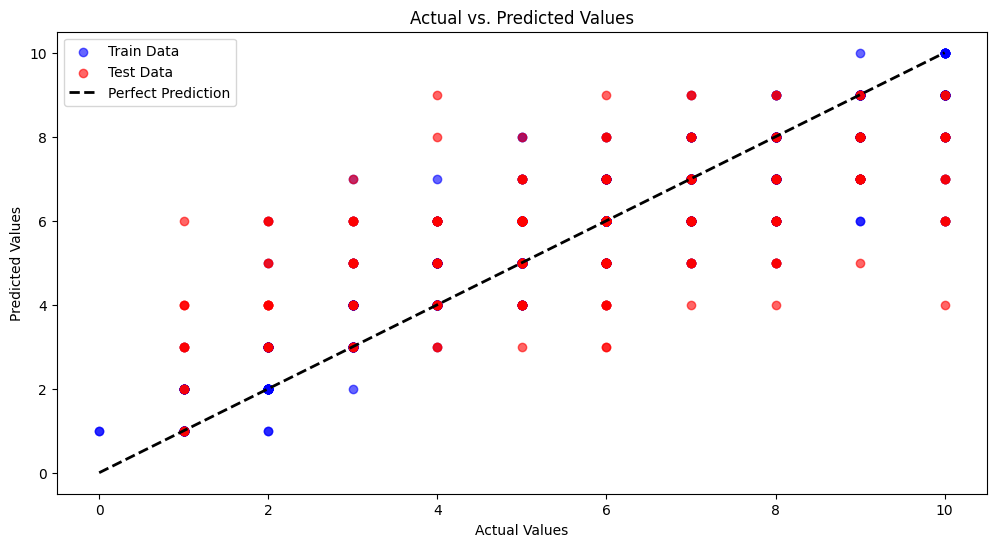

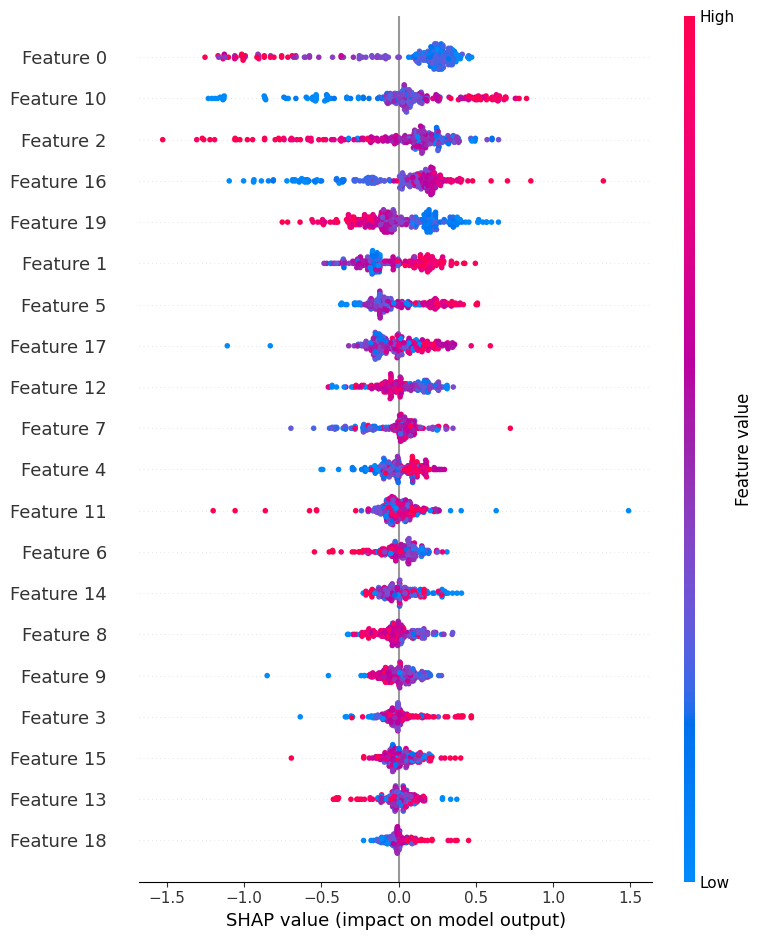

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from catboost import CatBoostRegressor
from lime.lime_tabular import LimeTabularExplainer

# Load the dataset
def load_data(file_path):
    df = pd.read_excel(file_path)
    keywords = df[[f'Keywords_Vector_{i}' for i in range(20)]]
    custom_data_structures = df[[f'Custom_Data_Structures_Vector_{i}' for i in range(20)]]
    final_marks = df["Final_Marks"]
    return keywords, custom_data_structures, final_marks

# Function to pad vectors with zeros to match length
def pad_with_zeros(vector, max_length):
    vector = np.atleast_2d(vector)
    if vector.shape[1] < max_length:
        padding = np.zeros((vector.shape[0], max_length - vector.shape[1]))
        vector = np.hstack((vector, padding))
    return vector

# Reduction and combination strategies
def combine_vectors(keywords, custom_data_structures, weights, fusion):
    weighted_keywords = weights[1] * keywords
    weighted_custom_data_structures = weights[0] * custom_data_structures

    if fusion == "add":
        max_length = max(weighted_keywords.shape[1], weighted_custom_data_structures.shape[1])
        weighted_keywords = pad_with_zeros(weighted_keywords, max_length)
        weighted_custom_data_structures = pad_with_zeros(weighted_custom_data_structures, max_length)
        combined_vectors = weighted_keywords + weighted_custom_data_structures
    return combined_vectors



# Load data
file_path = "pca.xlsx"
keywords, custom_data_structures, final_marks = load_data(file_path)

# Combine vectors
combined_vectors = combine_vectors(keywords, custom_data_structures, (1, 1), "add")


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(combined_vectors, final_marks, test_size=0.2, random_state=42, stratify=final_marks)

# Initialize and train model
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    l2_leaf_reg=4,
    early_stopping_rounds=15,
    random_state=43,
    verbose=0)

# Cross-validation prediction
cv = KFold(n_splits=10, shuffle=True, random_state=42)
y_train_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv, n_jobs=-1)

# Fit on training data
model.fit(X_train, y_train)

# Train metrics
y_train_pred = np.round(model.predict(X_train))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Test metrics
y_test_pred = np.round(model.predict(X_test))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Print metrics
print(f"Train Metrics: MAE={train_mae:.4f}, MSE={train_mse:.4f}, RMSE={train_rmse:.4f}, R2={train_r2:.4f}, MAPE={train_mape:.4f}")
print(f"Test Metrics: MAE={test_mae:.4f}, MSE={test_mse:.4f}, RMSE={test_rmse:.4f}, R2={test_r2:.4f}, MAPE={test_mape:.4f}")

# Visualization: Actual vs. Predicted plot
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, label='Train Data', alpha=0.6, color='blue')
plt.scatter(y_test, y_test_pred, label='Test Data', alpha=0.6, color='red')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

# LIME explanation
explainer = LimeTabularExplainer(X_train, mode="regression", training_labels=y_train, feature_names=[f'Non_Weighted_add_Feature_{i}' for i in range(X_train.shape[1])], discretize_continuous=True)

# Select a sample for LIME explanation
sample_index = 0
lime_exp = explainer.explain_instance(X_test[sample_index], model.predict)
lime_exp.show_in_notebook()

# SHAP analysis
shap.initjs()
explainer_shap = shap.TreeExplainer(model)
shap_values = explainer_shap.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


Train Metrics: MAE=0.5675, MSE=0.8193, RMSE=0.9051, R2=0.8607, MAPE=9144364725625.4941
Test Metrics: MAE=1.2591, MSE=2.7814, RMSE=1.6677, R2=0.5241, MAPE=0.3279


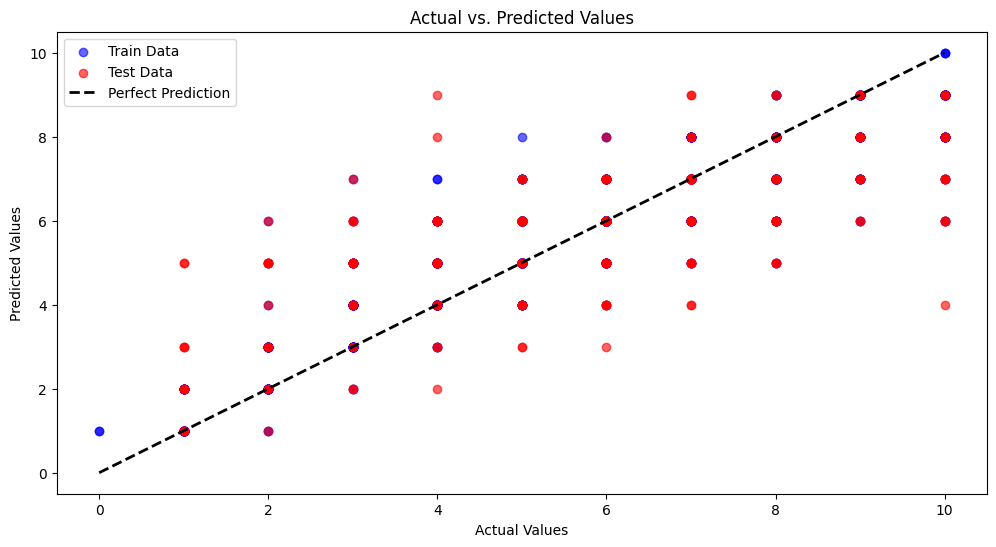

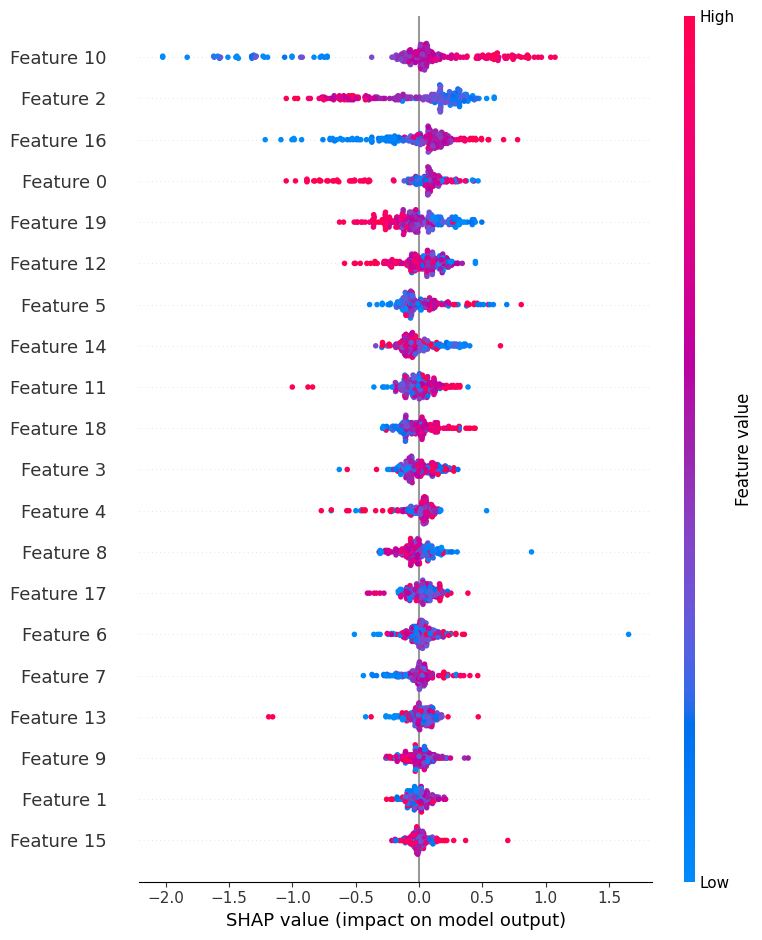

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from catboost import CatBoostRegressor
from lime.lime_tabular import LimeTabularExplainer

# Load the dataset
def load_data(file_path):
    df = pd.read_excel(file_path)
    keywords = df[[f'Keywords_Vector_{i}' for i in range(20)]]
    custom_data_structures = df[[f'Custom_Data_Structures_Vector_{i}' for i in range(20)]]
    final_marks = df["Final_Marks"]
    return keywords, custom_data_structures, final_marks

# Function to pad vectors with zeros to match length
def pad_with_zeros(vector, max_length):
    vector = np.atleast_2d(vector)
    if vector.shape[1] < max_length:
        padding = np.zeros((vector.shape[0], max_length - vector.shape[1]))
        vector = np.hstack((vector, padding))
    return vector

# Reduction and combination strategies
def combine_vectors(keywords, custom_data_structures, weights, fusion):
    weighted_keywords = weights[1] * keywords
    weighted_custom_data_structures = weights[0] * custom_data_structures

    if fusion == "add":
        max_length = max(weighted_keywords.shape[1], weighted_custom_data_structures.shape[1])
        weighted_keywords = pad_with_zeros(weighted_keywords, max_length)
        weighted_custom_data_structures = pad_with_zeros(weighted_custom_data_structures, max_length)
        combined_vectors = weighted_keywords + weighted_custom_data_structures
    return combined_vectors



# Load data
file_path = "pca.xlsx"
keywords, custom_data_structures, final_marks = load_data(file_path)

# Combine vectors
combined_vectors = combine_vectors(keywords, custom_data_structures, (1, 9), "add")


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(combined_vectors, final_marks, test_size=0.2, random_state=42, stratify=final_marks)

# Initialize and train model
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    l2_leaf_reg=4,
    early_stopping_rounds=15,
    random_state=43,
    verbose=0)

# Cross-validation prediction
cv = KFold(n_splits=10, shuffle=True, random_state=42)
y_train_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv, n_jobs=-1)

# Fit on training data
model.fit(X_train, y_train)

# Train metrics
y_train_pred = np.round(model.predict(X_train))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Test metrics
y_test_pred = np.round(model.predict(X_test))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Print metrics
print(f"Train Metrics: MAE={train_mae:.4f}, MSE={train_mse:.4f}, RMSE={train_rmse:.4f}, R2={train_r2:.4f}, MAPE={train_mape:.4f}")
print(f"Test Metrics: MAE={test_mae:.4f}, MSE={test_mse:.4f}, RMSE={test_rmse:.4f}, R2={test_r2:.4f}, MAPE={test_mape:.4f}")

# Visualization: Actual vs. Predicted plot
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, label='Train Data', alpha=0.6, color='blue')
plt.scatter(y_test, y_test_pred, label='Test Data', alpha=0.6, color='red')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

# LIME explanation
explainer = LimeTabularExplainer(X_train, mode="regression", training_labels=y_train, feature_names=[f'Weighted_Add_Feature_{i}' for i in range(X_train.shape[1])], discretize_continuous=True)

# Select a sample for LIME explanation
sample_index = 0
lime_exp = explainer.explain_instance(X_test[sample_index], model.predict)
lime_exp.show_in_notebook()

# SHAP analysis
shap.initjs()
explainer_shap = shap.TreeExplainer(model)
shap_values = explainer_shap.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


Train Metrics: MAE=0.3594, MSE=0.5746, RMSE=0.7580, R2=0.9023, MAPE=4572182362812.7598
Test Metrics: MAE=1.2591, MSE=2.6842, RMSE=1.6384, R2=0.5407, MAPE=0.3168


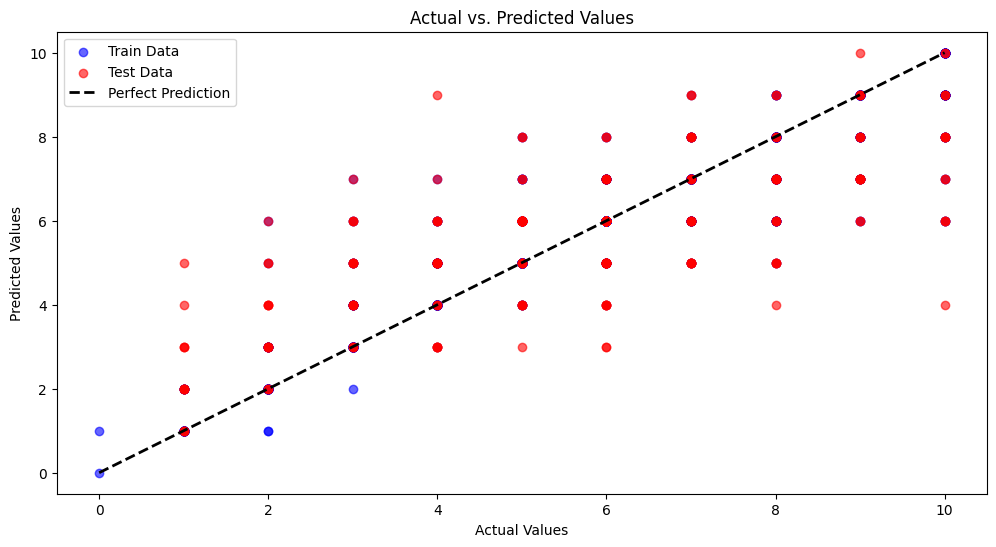

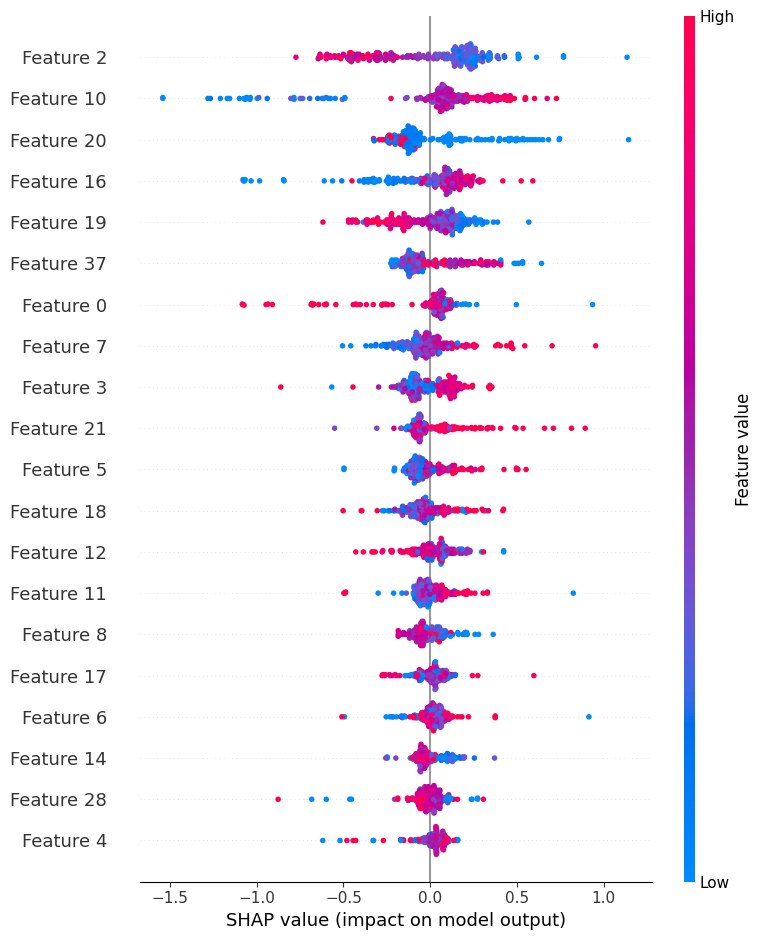

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from catboost import CatBoostRegressor
from lime.lime_tabular import LimeTabularExplainer

# Load the dataset
def load_data(file_path):
    df = pd.read_excel(file_path)
    keywords = df[[f'Keywords_Vector_{i}' for i in range(20)]]
    custom_data_structures = df[[f'Custom_Data_Structures_Vector_{i}' for i in range(20)]]
    final_marks = df["Final_Marks"]
    return keywords, custom_data_structures, final_marks


# Reduction and combination strategies
def combine_vectors(keywords, custom_data_structures, weights, fusion):
    weighted_keywords = weights[1] * keywords
    weighted_custom_data_structures = weights[0] * custom_data_structures

    if fusion == "concatenate":
        combined_vectors = np.concatenate((weighted_keywords, weighted_custom_data_structures), axis=1)
    return combined_vectors

# Load data
file_path = "pca.xlsx"
keywords, custom_data_structures, final_marks = load_data(file_path)

# Combine vectors
combined_vectors = combine_vectors(keywords, custom_data_structures, (1, 1), "concatenate")


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(combined_vectors, final_marks, test_size=0.2, random_state=42, stratify=final_marks)

# Initialize and train model
model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.05,
    l2_leaf_reg=5,
    early_stopping_rounds=15,
    random_state=43,
    verbose=0)

# Cross-validation prediction
cv = KFold(n_splits=10, shuffle=True, random_state=42)
y_train_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv, n_jobs=-1)

# Fit on training data
model.fit(X_train, y_train)

# Train metrics
y_train_pred = np.round(model.predict(X_train))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Test metrics
y_test_pred = np.round(model.predict(X_test))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Print metrics
print(f"Train Metrics: MAE={train_mae:.4f}, MSE={train_mse:.4f}, RMSE={train_rmse:.4f}, R2={train_r2:.4f}, MAPE={train_mape:.4f}")
print(f"Test Metrics: MAE={test_mae:.4f}, MSE={test_mse:.4f}, RMSE={test_rmse:.4f}, R2={test_r2:.4f}, MAPE={test_mape:.4f}")

# Visualization: Actual vs. Predicted plot
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, label='Train Data', alpha=0.6, color='blue')
plt.scatter(y_test, y_test_pred, label='Test Data', alpha=0.6, color='red')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

# LIME explanation
explainer = LimeTabularExplainer(X_train, mode="regression", training_labels=y_train, feature_names=[f'No_weighted_Concatenate_Feature_{i}' for i in range(X_train.shape[1])], discretize_continuous=True)

# Select a sample for LIME explanation
sample_index = 0
lime_exp = explainer.explain_instance(X_test[sample_index], model.predict)
lime_exp.show_in_notebook()

# SHAP analysis
shap.initjs()
explainer_shap = shap.TreeExplainer(model)
shap_values = explainer_shap.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


Train Metrics: MAE=0.3594, MSE=0.5746, RMSE=0.7580, R2=0.9023, MAPE=4572182362812.7598
Test Metrics: MAE=1.2591, MSE=2.6842, RMSE=1.6384, R2=0.5407, MAPE=0.3168


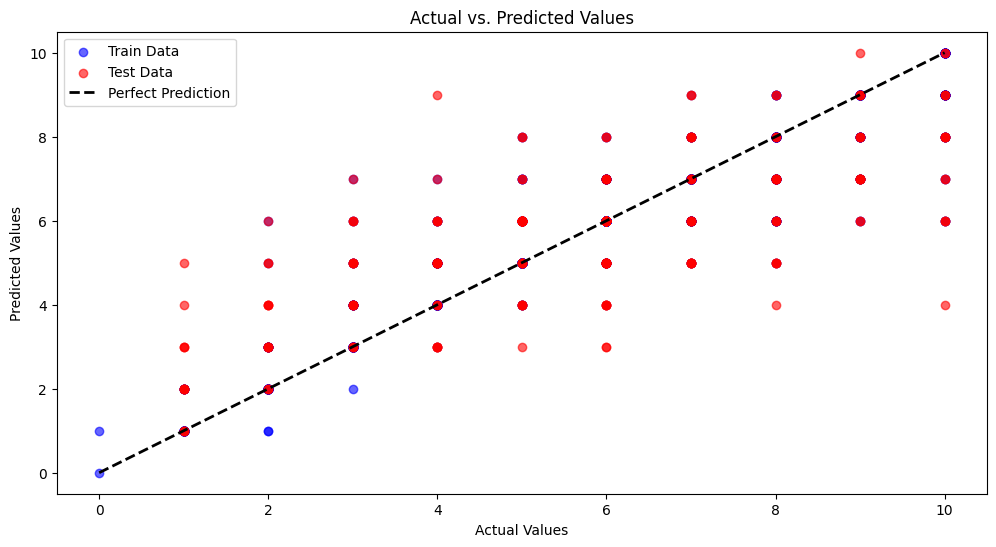

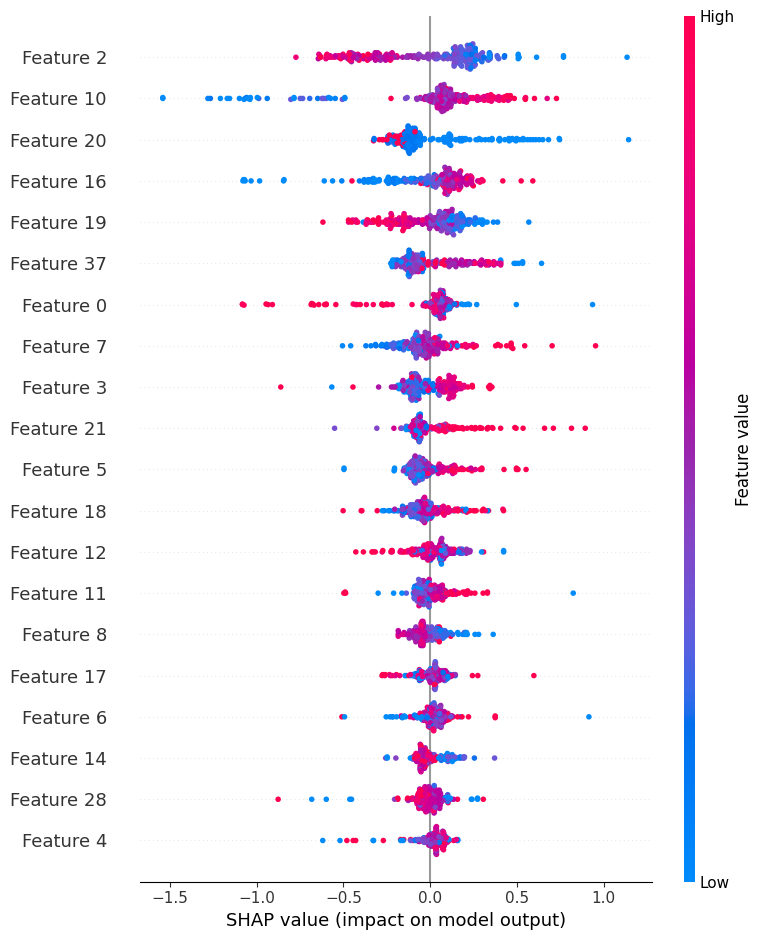

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from catboost import CatBoostRegressor
from lime.lime_tabular import LimeTabularExplainer

# Load the dataset
def load_data(file_path):
    df = pd.read_excel(file_path)
    keywords = df[[f'Keywords_Vector_{i}' for i in range(20)]]
    custom_data_structures = df[[f'Custom_Data_Structures_Vector_{i}' for i in range(20)]]
    final_marks = df["Final_Marks"]
    return keywords, custom_data_structures, final_marks


# Reduction and combination strategies
def combine_vectors(keywords, custom_data_structures, weights, fusion):
    weighted_keywords = weights[1] * keywords
    weighted_custom_data_structures = weights[0] * custom_data_structures

    if fusion == "concatenate":
        combined_vectors = np.concatenate((weighted_keywords, weighted_custom_data_structures), axis=1)
    return combined_vectors

# Load data
file_path = "pca.xlsx"
keywords, custom_data_structures, final_marks = load_data(file_path)

# Combine vectors
combined_vectors = combine_vectors(keywords, custom_data_structures, (1, 9), "concatenate")


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(combined_vectors, final_marks, test_size=0.2, random_state=42, stratify=final_marks)

# Initialize and train model
model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.05,
    l2_leaf_reg=5,
    early_stopping_rounds=15,
    random_state=43,
    verbose=0)

# Cross-validation prediction
cv = KFold(n_splits=10, shuffle=True, random_state=42)
y_train_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv, n_jobs=-1)

# Fit on training data
model.fit(X_train, y_train)

# Train metrics
y_train_pred = np.round(model.predict(X_train))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Test metrics
y_test_pred = np.round(model.predict(X_test))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Print metrics
print(f"Train Metrics: MAE={train_mae:.4f}, MSE={train_mse:.4f}, RMSE={train_rmse:.4f}, R2={train_r2:.4f}, MAPE={train_mape:.4f}")
print(f"Test Metrics: MAE={test_mae:.4f}, MSE={test_mse:.4f}, RMSE={test_rmse:.4f}, R2={test_r2:.4f}, MAPE={test_mape:.4f}")

# Visualization: Actual vs. Predicted plot
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, label='Train Data', alpha=0.6, color='blue')
plt.scatter(y_test, y_test_pred, label='Test Data', alpha=0.6, color='red')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

# LIME explanation
explainer = LimeTabularExplainer(X_train, mode="regression", training_labels=y_train, feature_names=[f'Weighted_Concatenate_Feature_{i}' for i in range(X_train.shape[1])], discretize_continuous=True)

# Select a sample for LIME explanation
sample_index = 0
lime_exp = explainer.explain_instance(X_test[sample_index], model.predict)
lime_exp.show_in_notebook()

# SHAP analysis
shap.initjs()
explainer_shap = shap.TreeExplainer(model)
shap_values = explainer_shap.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)
